In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\User\Downloads\data_jobs.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

def to_list(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)
    
df['job_skills'] = df['job_skills'].apply(to_list)

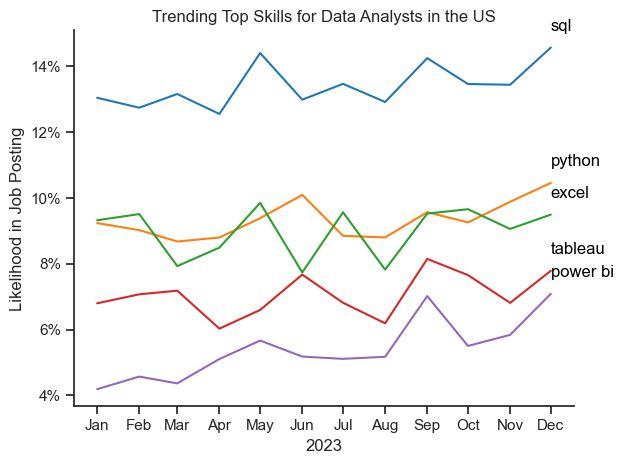

In [ ]:
df_india = df[df['job_country'] == 'India'].copy()
df_india_da = df_india[df_india['job_title_short'] == 'Data Analyst']
df_skills = df_india_da.explode('job_skills')
df_skills['job_posted_month'] = df_skills['job_posted_date'].dt.to_period ('M')
df_pivot = df_skills.pivot_table(index= 'job_posted_month', columns= 'job_skills', aggfunc= 'size', fill_value= 0)
df_pivot.loc['total'] = df_pivot.sum()
df_pivot = df_pivot[df_pivot.loc['total'].sort_values(ascending= False).index]
df_pivot = df_pivot.drop('total')
df_pivot.index = df_pivot.index.astype('period[M]')
df_total = df_skills.groupby('job_posted_month').size()
df_skill_percentage = df_pivot.iloc[:12].div(df_total/100, axis=0)

from matplotlib.ticker import PercentFormatter

df_plot = df_skill_percentage.iloc[:, :5]
df_plot.index = df_plot.index.to_timestamp()
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xticks(
    ticks=df_plot.index, 
    labels=[p.strftime('%b') for p in df_plot.index], 
    rotation=0
)
# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(df_plot.index[-1], df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.tight_layout()

plt.show()